In [1]:
import tensorflow as tf

In [14]:
model=tf.keras.models.load_model('/Users/gangsickmun/Downloads/cats_dogs_basic_cnn_3.h5')

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import numpy as np
path = "/Users/gangsickmun/Desktop/dog_cat/test_set/test_set/cats/cat.4003.jpg"
data = load_img(path, target_size=(150,150))

In [16]:
data = img_to_array(data).astype('float32')
data /= 255.0


In [17]:
model.predict(data.reshape(-1 ,150, 150, 3))

2023-04-18 12:11:37.771054: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 1s 782ms/step


array([[0.56690073]], dtype=float32)

In [20]:
4200-1000*(4200//1000)

200

In [22]:
a=[0]*10
a


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [24]:
4200%1000

200

In [4]:
import requests
import base64
url = "http://127.0.0.1:8000/predict/"
with open("/Users/gangsickmun/Desktop/dog_cat/test_set/test_set/dogs/dog.4029.jpg", 'rb') as img:
    base64_string = base64.b64encode(img.read())
r = requests.post(url, data = {'image' : base64_string})
r.text


'{"result":"강아지 사진을 보내셨네요..."}'

In [5]:
import pandas as pd
data='https://raw.githubusercontent.com/Datamanim/pandas/main/chipo.csv'
df=pd.read_csv(data)

In [9]:
df[df['quantity']==3].head(5).reset_index(drop=True) # reset_index를 통해서 인덱스를 다시 설정하고 
                                                    # 원래 인덱스는 drop=True를 통해서 원래 인덱스를 제거

,order_id,quantity,item_name,choice_description,item_price
0,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",$32.94
1,193,3,Bowl,"[Braised Carnitas, Pinto Beans, [Sour Cream, C...",$22.20
2,284,3,Canned Soft Drink,[Diet Coke],$3.75
3,338,3,Bottled Water,NaN,$3.27
4,350,3,Canned Soft Drink,[Sprite],$3.75


In [20]:
df['new_price']=df['item_price'].str[1:].astype('float')

In [38]:
df[df['item_name'] == 'Chicken Salad Bowl'].reset_index(drop=True)

,order_id,quantity,item_name,choice_description,item_price,new_price
0,20,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75,8.75
1,60,2,Chicken Salad Bowl,"[Tomatillo Green Chili Salsa, [Sour Cream, Che...",$22.50,22.50
2,94,2,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$22.50,22.50
3,111,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$8.75,8.75
4,137,2,Chicken Salad Bowl,"[Fresh Tomato Salsa, Fajita Vegetables]",$17.50,17.50
...,...,...,...,...,...,...
105,1813,2,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$17.50,17.50
106,1822,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Black Beans, Cheese, Gua...",$11.25,11.25
107,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
108,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


In [5]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test)  = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 195s 1us/step


In [24]:
X_train=X_train/255.0
X_test=X_test/255.0

In [35]:
y_train=y_train.flatten()
y_test=y_test.flatten()

In [36]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [22]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [37]:
y_train[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

In [44]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

batch_size = 32
num_classes = 10
epochs = 50


model = Sequential()
model.add(Conv2D(32, 3, padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.compile(optimizer=optimizers.RMSprop(),
            loss='categorical_crossentropy', metrics=['acc'])

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [46]:
history = model.fit(X_train, y_train, batch_size=batch_size,
                    epochs=epochs)

Epoch 1/50


2023-04-19 16:43:41.290657: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 35s 20ms/step - loss: 1.5428 - acc: 0.4444
Epoch 2/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1116 - acc: 0.6077
Epoch 3/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9821 - acc: 0.6599
Epoch 4/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9287 - acc: 0.6817
Epoch 5/50
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8991 - acc: 0.6941
Epoch 6/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9051 - acc: 0.6953
Epoch 7/50
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9072 - acc: 0.6969
Epoch 8/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9120 - acc: 0.6948
Epoch 9/50
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9312 - acc: 0.6920
Epoch 10/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9438 - acc: 0.6893
Epoch 11/50
1563/156

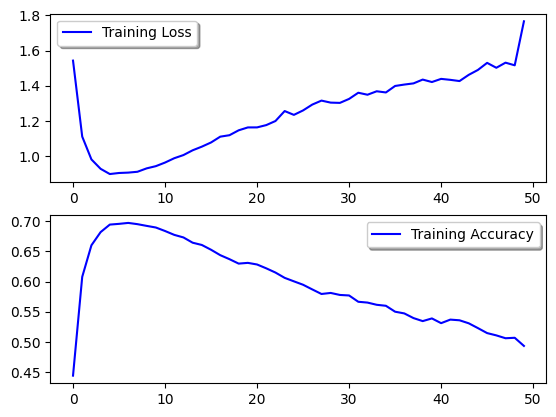

In [47]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)


In [12]:
import requests 
from bs4 import BeautifulSoup as bs
url='https://fifaonline4.nexon.com/datacenter/index?n1Confederation=0&n4LeagueId=0&strSeason=%2C272%2C&strPosition=&strPhysical=&n1LeftFootAblity=0&n1RightFootAblity=0&n1SkillMove=0&n1InterationalRep=0&n4BirthMonth=0&n4BirthDay=0&n4TeamId=0&n4NationId=0&strAbility1=&strAbility2=&strAbility3=&strTrait1=&strTrait2=&strTrait3=&strTraitNon1=&strTraitNon2=&strTraitNon3=&n1Strong=1&n1Grow=0&n1TeamColor=0&strSkill1=sprintspeed&strSkill2=acceleration&strSkill3=strength&strSkill4=stamina&strSearchStatus=off&strOrderby=&teamcolorid=0&strTeamColorCategory=&n1History=0&n4PlayYear=0&strPlayerName=&strTeamName=&strNationName=&strTeamColorName=&n4OvrMin=0&n4OvrMax=200&n4SalaryMin=4&n4SalaryMax=99&n8PlayerGrade1Min=0&n8PlayerGrade1Max=99999&n1Ability1Min=40&n1Ability1Max=200&n1Ability2Min=40&n1Ability2Max=200&n1Ability3Min=40&n1Ability3Max=200&n4BirthYearMin=1900&n4BirthYearMax=2010&n4HeightMin=140&n4HeightMax=208&n4WeightMin=50&n4WeightMax=110&n4AvgPointMin=0&n4AvgPointMax=10'
paylod={"n1Confederation": '0',
"n4LeagueId": '0',
"strSeason": '272',
"strPosition": '',
"strPhysical": '',
"n1LeftFootAblity": '0',
"n1RightFootAblity": '0',
"n1SkillMove": '0',
"n1InterationalRep": '0',
"n4BirthMonth": '0',
"n4BirthDay": '0',
"n4TeamId": '0',
"n4NationId": '0',
"strAbility1": '',
"strAbility2": '',
"strAbility3": '',
"strTrait1": '',
"strTrait2": '',
"strTrait3": '',
"strTraitNon1":'' ,
"strTraitNon2": '',
"strTraitNon3": '',
"n1Strong": '1',
"n1Grow": '0',
"n1TeamColor": '0',
"strSkill1": 'sprintspeed',
"strSkill2": 'acceleration',
"strSkill3": 'strength',
"strSkill4": 'stamina',
"strSearchStatus": 'off',
"strOrderby":  'n8playergrade1 descending',
"teamcolorid": '0',
"strTeamColorCategory": '',
"n1History": '0',
"n4PlayYear": '0',
"strPlayerName": '',
"strTeamName": '',
"strNationName":'' ,
"strTeamColorName":'' ,
"n4OvrMin": '0',
"n4OvrMax": '200',
"n4SalaryMin": '4',
"n4SalaryMax": '99',
"n8PlayerGrade1Min": '0',
"n8PlayerGrade1Max": '99999',
"n1Ability1Min": '40',
"n1Ability1Max": '200',
"n1Ability2Min": '40',
"n1Ability2Max": '200',
"n1Ability3Min": '40',
"n1Ability3Max": '200',
"n4BirthYearMin": '1900',
"n4BirthYearMax": '2010',
"n4HeightMin": '140',
"n4HeightMax": '208',
"n4WeightMin": '50',
"n4WeightMax": '110',
"n4AvgPointMin": '0',
"n4AvgPointMax": '10',
"n4PageNo": '1rd=0.3898883070907364',
}
r=requests.post(url, data=paylod)

In [13]:
bs(r.text)


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta charset="utf-8"/>
<title>EA SPORTS™ FIFA ONLINE 4</title>
<meta content="width=1200" name="viewport"/>
<meta content="index,follow" name="robots"/>
<meta content="EA SPORTS ™ FIFA ONLINE 4 - NEXON Korea" name="description"/>
<meta content="NEXON Korea" name="author"/>
<meta content="NEXON, 넥슨, NEXON Korea, 넥슨코리아, FIFA, 피파, 피파온라인, 피파 온라인 4, EA, EA Sports, 스포츠, 피파온라인4, FO4, 피파 온라인4, 피파4, 피4, FIFA4, fifa onlie, fifa onlie4" name="keywords"/>
<meta content="EA SPORTS ™ FIFA ONLINE 4" property="og:title"/>
<meta content="준비는 끝났다. 우리는 새로운 경기를 지배할 것이다." property="og:description"/>
<meta content="https://ssl.nexon.com/s2/game/fo4/obt/banner_facebook.jpg" property="og:image"/>
<meta content="https://fifaonline4.nexon.com/datacenter/index?n1Confederation=0&amp;n4LeagueId=0&amp;strSeason=%2C272%2C&amp;strPosition=&amp;strPhysical=&amp;n1LeftFootAblity=0&amp;n1RightFootAblity=0&amp;n1SkillMove=0&

In [15]:
pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 34.9 MB/s eta 0:00:0000:0100:01
  Using cached trio-0.22.0-py3-none-any.whl (384 kB)
  Using cached sniffio-1.3.0-py3-none-any.whl (10 kB)
  Using cached attrs-23.1.0-py3-none-any.whl (61 kB)
  Using cached async_generator-1.10-py3-none-any.whl (18 kB)
  Using cached outcome-1.2.0-py2.py3-none-any.whl (9.7 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl (24 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.


In [31]:
import requests
from bs4 import BeautifulSoup
import urllib
count2=1
for i in range(10):
    # 검색할 키워드 입력
    keyword = "배우 장기용 인물사진"

    # 검색 URL 주소 입력
    url = f"https://www.google.com/search?q={keyword}&source=lnms&tbm=isch&start=100"

    # HTTP 요청 보내기
    header = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36 Edge/16.16299"}
    html = requests.get(url, headers=header).text

    # HTTP 응답에서 이미지 링크 추출
    soup = BeautifulSoup(html, "html.parser")
    img_tags = soup.find_all("img")

    # 이미지 다운로드
    count = 0
    
    for img in img_tags:
        try:
            count2+=1
            img_url = img["src"]
            if img_url.startswith("http"):
                img_name = f"image_{count}_{count2}.jpg"
                urllib.request.urlretrieve(img_url, img_name)
                print(f"다운로드 완료: {img_name}")
                count += 1
        except Exception as e:
            print(f"오류 발생: {e}")


다운로드 완료: image_0_3.jpg
다운로드 완료: image_1_4.jpg
다운로드 완료: image_2_5.jpg
다운로드 완료: image_3_6.jpg
다운로드 완료: image_4_7.jpg
다운로드 완료: image_5_8.jpg
다운로드 완료: image_6_9.jpg
다운로드 완료: image_7_10.jpg
다운로드 완료: image_8_11.jpg
다운로드 완료: image_9_12.jpg
다운로드 완료: image_10_13.jpg
다운로드 완료: image_11_14.jpg
다운로드 완료: image_12_15.jpg
다운로드 완료: image_13_16.jpg
다운로드 완료: image_14_17.jpg
다운로드 완료: image_15_18.jpg
다운로드 완료: image_16_19.jpg
다운로드 완료: image_17_20.jpg
다운로드 완료: image_18_21.jpg
다운로드 완료: image_19_22.jpg
다운로드 완료: image_0_24.jpg
다운로드 완료: image_1_25.jpg
다운로드 완료: image_2_26.jpg
다운로드 완료: image_3_27.jpg
다운로드 완료: image_4_28.jpg
다운로드 완료: image_5_29.jpg
다운로드 완료: image_6_30.jpg
다운로드 완료: image_7_31.jpg
다운로드 완료: image_8_32.jpg
다운로드 완료: image_9_33.jpg
다운로드 완료: image_10_34.jpg
다운로드 완료: image_11_35.jpg
다운로드 완료: image_12_36.jpg
다운로드 완료: image_13_37.jpg
다운로드 완료: image_14_38.jpg
다운로드 완료: image_15_39.jpg
다운로드 완료: image_16_40.jpg
다운로드 완료: image_17_41.jpg
다운로드 완료: image_18_42.jpg
다운로드 완료: image_19_43.jpg
다운로드 완료: image_0_45.jpg
다운로

KeyboardInterrupt: 

In [37]:
import os
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from PIL import Image
import io
import time
# 크롬드라이버 위치 설정
DRIVER_PATH = '/usr/local/bin/chromedriver'
# 크롬 드라이버 옵션 설정
listm=['가수 백예린', '가수 이소라','가수 윤아배우', '배우 민효린','배우 신민아','배우 수애','배우 서현진가수', '가수 송가인','개그우먼 신봉선','개그우먼 이영자']
for i in listm:
    options = Options()
    options.add_argument('--headless')  # 창 안띄우기
    options.add_argument('--no-sandbox')  # 리눅스 환경에서 필요한 옵션
    options.add_argument('--disable-dev-shm-usage')  # 리눅스 환경에서 필요한 옵션
    # 검색어 설정
    search_name = i
    # 검색어를 이용한 구글 이미지 검색 url
    url = f'https://www.google.com/search?q={search_name}&source=lnms&tbm=isch'
    # 크롬 드라이버 실행
    service = Service(DRIVER_PATH)
    driver = webdriver.Chrome(service=service, options=options)
    # url 접속
    driver.get(url)
    # 페이지 로드를 위한 대기 시간
    time.sleep(2)
    # 이미지 로딩을 위한 스크롤 다운
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height
    # 이미지 링크 추출
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    img_tags = soup.find_all('img')
    urls = []
    for img in img_tags:
        try:
            url = img['src']
            if 'http' in url:
                urls.append(url)
        except:
            pass
    # 이미지 다운로드
    os.makedirs(f'./images{search_name}', exist_ok=True)
    count = 0
    for url in urls:
        try:
            response = requests.get(url, stream=True)
            # 이미지 사이즈 확인
            img = Image.open(io.BytesIO(response.content))
            width, height = img.size
            if width >= 20 and height >= 20:
                file_name = f'./images{search_name}/{count}.jpg'
                with open(file_name, 'wb') as out_file:
                    out_file.write(response.content)
                print(f'{file_name} saved')
                count += 1
                if count == 200:
                    break
        except:
            pass
    # 크롬 드라이버 종료
    driver.quit()

./images가수 백예린/0.jpg saved
./images가수 백예린/1.jpg saved
./images가수 백예린/2.jpg saved
./images가수 백예린/3.jpg saved
./images가수 백예린/4.jpg saved
./images가수 백예린/5.jpg saved
./images가수 백예린/6.jpg saved
./images가수 백예린/7.jpg saved
./images가수 백예린/8.jpg saved
./images가수 백예린/9.jpg saved
./images가수 백예린/10.jpg saved
./images가수 백예린/11.jpg saved
./images가수 백예린/12.jpg saved
./images가수 백예린/13.jpg saved
./images가수 백예린/14.jpg saved
./images가수 백예린/15.jpg saved
./images가수 백예린/16.jpg saved
./images가수 백예린/17.jpg saved
./images가수 백예린/18.jpg saved
./images가수 백예린/19.jpg saved
./images가수 백예린/20.jpg saved
./images가수 백예린/21.jpg saved
./images가수 백예린/22.jpg saved
./images가수 백예린/23.jpg saved
./images가수 백예린/24.jpg saved
./images가수 백예린/25.jpg saved
./images가수 백예린/26.jpg saved
./images가수 백예린/27.jpg saved
./images가수 백예린/28.jpg saved
./images가수 백예린/29.jpg saved
./images가수 백예린/30.jpg saved
./images가수 백예린/31.jpg saved
./images가수 백예린/32.jpg saved
./images가수 백예린/33.jpg saved
./images가수 백예린/34.jpg saved
./images가수 백예린/35.jpg saved
./

In [ ]:
남 : 배우 장기용, 배우 우도환, 배우 최현욱, 배우 차은우, 축구선수 이천수, 방송인 하하, 배우 최민식, 배우 김우빈, 배우 최우식, 배우 이광수
여 : 가수 백예린, 가수 이소라, 가수 윤아,  

In [ ]:
listm=['가수 백예린', '가수 이소라','가수 윤아배우', '배우 민효린','배우 신민아','배우 수애','배우 서현진가수', '가수 송가인','개그우먼 신봉선','개그우먼 이영자']